In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from tqdm import tqdm, trange
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
from datetime import datetime

In [3]:
s = Service("C:/Users/Владислав/Desktop/ChromeDriver/chromedriver.exe")
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-notifications")
#chrome_options.add_argument("--headless")
browser = webdriver.Chrome(service = s, options = chrome_options)
browser.maximize_window()
browser.get("https://agfundernews.com/category/agtech-2")
sleep(3)
browser.implicitly_wait(10)


all_links = []

start = datetime.now()
page = browser.page_source
soup = BeautifulSoup(page)
for link in soup.find_all("a"):
    cur_link = link.get("href")
    if (cur_link.startswith("https://agfundernews.com/") and not cur_link.endswith("https://agfundernews.com/")
        and not cur_link.startswith("https://agfundernews.com/category") and not cur_link.startswith("https://agfundernews.com/jobs")
        and not cur_link.startswith("https://agfundernews.com/agfunder-network-partners") and not cur_link.startswith("https://agfundernews.com/about")
        and not cur_link.startswith("https://agfundernews.com/staff") and not cur_link.startswith("https://agfundernews.com/sponsor-sprout")
        and not cur_link.startswith("https://agfundernews.com/feed") and not cur_link.startswith("https://agfundernews.com/terms-of-use")
        and not cur_link.startswith("https://agfundernews.com/privacy-cookie-policy")):
        if cur_link not in all_links:
            all_links.append(cur_link)

while True:
    try:
        WebDriverWait(browser, 30).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#container > div.elementor.elementor-12933.elementor-location-archive > div > div > section > div > div > div.elementor-element.elementor-element-3130d3c6.elementor-column.elementor-col-50.elementor-top-column > div > div > div.elementor-element.elementor-element-706f212b.elementor-grid-1.elementor-posts--thumbnail-left.elementor-grid-tablet-1.elementor-grid-mobile-1.elementor-widget.elementor-widget-archive-posts > div > nav > a.page-numbers.next"
                                                                    )))
        next_page = browser.find_element(By.CSS_SELECTOR, "#container > div.elementor.elementor-12933.elementor-location-archive > div > div > section > div > div > div.elementor-element.elementor-element-3130d3c6.elementor-column.elementor-col-50.elementor-top-column > div > div > div.elementor-element.elementor-element-706f212b.elementor-grid-1.elementor-posts--thumbnail-left.elementor-grid-tablet-1.elementor-grid-mobile-1.elementor-widget.elementor-widget-archive-posts > div > nav > a.page-numbers.next")
        next_page.click()
        sleep(3)
        page = browser.page_source
        soup = BeautifulSoup(page)
        for link in soup.find_all("a"):
            cur_link = link.get("href")
            if (cur_link.startswith("https://agfundernews.com/") and not cur_link.endswith("https://agfundernews.com/")
                and not cur_link.startswith("https://agfundernews.com/category") and not cur_link.startswith("https://agfundernews.com/jobs")
                and not cur_link.startswith("https://agfundernews.com/agfunder-network-partners") and not cur_link.startswith("https://agfundernews.com/about")
                and not cur_link.startswith("https://agfundernews.com/staff") and not cur_link.startswith("https://agfundernews.com/sponsor-sprout")
                and not cur_link.startswith("https://agfundernews.com/feed") and not cur_link.startswith("https://agfundernews.com/terms-of-use")
                and not cur_link.startswith("https://agfundernews.com/privacy-cookie-policy")):
                if cur_link not in all_links:
                    all_links.append(cur_link)
    except TimeoutException:
        print("Sorry! Time is up!")
        break
    except ElementClickInterceptedException:
        print("Sorry! Element is intercepted!")
        break
    except NoSuchElementException:
        print("Sorry! The element is no longer exists!")
        break
        
print(f"Parsing time: {datetime.now() - start}")

Sorry! Time is up!
Parsing time: 0:11:38.612681


In [4]:
len(all_links)

2782

In [5]:
import pandas as pd

with open(r"AgFunder-URL.csv", mode = "w", encoding="utf-8") as file:
    for i in all_links:
        file.write(f"{i}" + "\n")

columns = ["URL-links"]

df = pd.read_csv("AgFunder-URL.csv", names=columns)
pd.set_option("display.max_colwidth", None)
df.head(20)

,URL-links
0,https://agfundernews.com/guide-to-agroforestry-what-it-is-how-it-can-improve-ag-and-fight-climate-change
1,https://agfundernews.com/ag-marketplace-agriconomie-lands-e60m-to-help-europes-farmers-transition-to-regen-ag
2,https://agfundernews.com/where-will-agtech-exits-come-from-next-3-corporates-weigh-in
3,https://agfundernews.com/jewish-american-entrepreneur-bruce-gurfein-wants-to-unite-middle-eastern-agritech-startups-and-drove-9000km-across-region-to-do-so
4,https://agfundernews.com/movin-up-and-out-beyonds-executive-exodus-ufas-new-ceo-a-general-mills-vet-joints-ever-ag
5,https://agfundernews.com/another-blow-for-indoor-farm-robotics-as-iron-ox-lays-off-nearly-half-its-staff
6,https://agfundernews.com/4-ways-to-narrow-the-gap-between-academia-and-industry-in-order-to-advance-sustainable-agriculture
7,https://agfundernews.com/the-week-in-agrifoodtech-bayer-backs-high-protein-chickpeas-qwick-lands-40m-vertical-farms-shut-down
8,https://agfundernews.com/robotic-vertical-farming-startup-fifth-season-shuts-down
9,https://agfundernews.com/good-food-innovation-funds-first-cohort-gets-1m-to-make-better-food-accessible-to-africans


In [14]:
headings = []
content = []

for url in tqdm(df["URL-links"].tolist()):
    browser.get(url)
    page = browser.page_source
    soup = BeautifulSoup(page)
    title = soup.h1.get_text()
    text = soup.find_all("div", class_ = "elementor-widget-container")[15].get_text().replace("\n", " ")
    text = text.replace("  ", " ").replace("\xa0", " ").strip()
    headings.append(title)
    content.append(text)
    


100%|████████████████████████████████████████████████████████████████████████████| 2782/2782 [1:20:00<00:00,  1.73s/it]


In [15]:
print(len(headings))
len(content)

2782


2782

In [16]:
zip_list = list(zip(headings, content))
zip_list[:10]

[('A mini guide to agroforestry: what is it & how can it improve ag and fight climate change?',
  'Like many regenerative and restorative agricultural practices, agroforestry is a newish term for an ancient concept. Cultures around the world have for centuries relied on traditional land-use practices that link trees, crops and livestock together. This intersection has provided critical access to food, fuel, medicines and other necessities. Modern agriculture stifled agroforestry for decades in favor of mono-cropping. Fortunately, that is beginning to change as around the world farmers, ranchers landowners and rural communities re-introduce practices into their operations. There are numerous reasons, financial, ecological and otherwise, to adopt agroforestry. It is also increasingly seen as a critical part of fighting climate change. But what does it entail and who should practice it? Read on for a quick guide to all things agroforestry. So what exactly is agroforestry? The United State

In [18]:
with open(r"AgFunder-AgTech-news.txt", mode = "w", encoding="utf-8") as file:
    for title, text in zip_list:
        file.write(f"{title};{text}" + "\n")
columns = ["Title", "Content"]
data = pd.read_csv("AgFunder-AgTech-news.txt", delimiter = ";", names = columns)
pd.reset_option("display.max_colwidth", None)
data.head(10)

,Title,Content
0,A mini guide to agroforestry: what is it & how...,Like many regenerative and restorative agricul...
1,Brief: Agriconomie lands €60m ($60m) to help E...,Online agribusiness marketplace Agriconomie ha...
2,Where will agtech exits come from next? 3 corp...,"Climate reporting, automation, and physical pr..."
3,Jewish-American entrepreneur Bruce Gurfein wan...,An entrepreneur from the age of 17 when he fou...
4,"Movin’ up and out: Beyond’s executive exodus, ...","News moves fast in agrifoodtech, and high-prof..."
5,Brief: Another blow for indoor farm robotics a...,Indoor farm robotics startup Iron Ox cut 50 jo...
6,4 ways to narrow the gap between academia and ...,One particular question stood out for me at th...
7,The Week in Agrifoodtech: Bayer backs high-pro...,"Bayer’s investment arm, Leaps by Bayer, invest..."
8,Vertical farming startup Fifth Season shuts down,US vertical farming startup Fifth Season has s...
9,Good Food Innovation Fund’s first cohort gets ...,Kenya’s Good Food Innovation Fund (GFIF) recen...


In [25]:
titles = " ".join(data["Title"].tolist())
entire_content = " ".join(list(map(str, data["Content"].tolist())))
final = " ".join([titles, entire_content])

most_frequency = final.split()

In [46]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["s", "said", "will", "still", "u", "one", "re"])
print(stopwords)

{'ours', 'when', 'an', "i'll", "can't", 'over', "haven't", 'any', 'for', 'about', "how's", "you'd", "where's", 'theirs', "wasn't", 'said', 'herself', 'r', 'than', 'shall', 'here', "shan't", "they'll", 'all', 'our', 'how', 'only', 'should', 'there', 'other', 'at', 'do', 'yours', "they've", 'my', 'also', 'own', "who's", 'they', "she's", 'your', 'it', 'because', 'doing', 'did', 'after', 'been', 'under', "we'd", 'www', 'not', 'or', 'since', 'themselves', 'whom', 'by', 'himself', 'is', "won't", "you're", "hadn't", 'however', 'just', 'his', "we're", "doesn't", 'before', 'more', 'be', 'get', 'will', 'on', 'you', 'too', 'then', 'hence', 'would', 'me', "that's", "i'm", "he's", 'myself', "why's", "we've", 'off', 'we', 're', 'these', 'into', 'against', 'can', "mustn't", 'down', 'otherwise', 'up', 'http', 'cannot', 'he', 'very', 'were', 'as', 'who', 'one', "don't", 'its', "they'd", 'such', 'have', "i'd", 'nor', 'of', 'through', 'once', 'that', "couldn't", 'so', 'each', 'still', 'com', 'else', "her

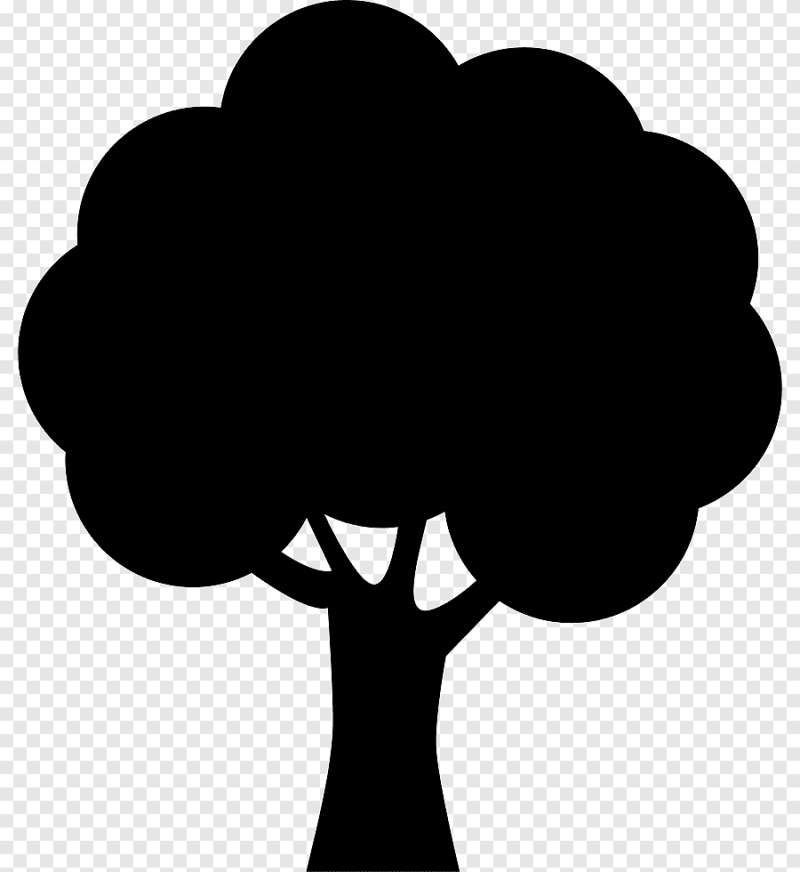

In [47]:
image = Image.open("C:/Users/Владислав/Desktop/tree.png")
image

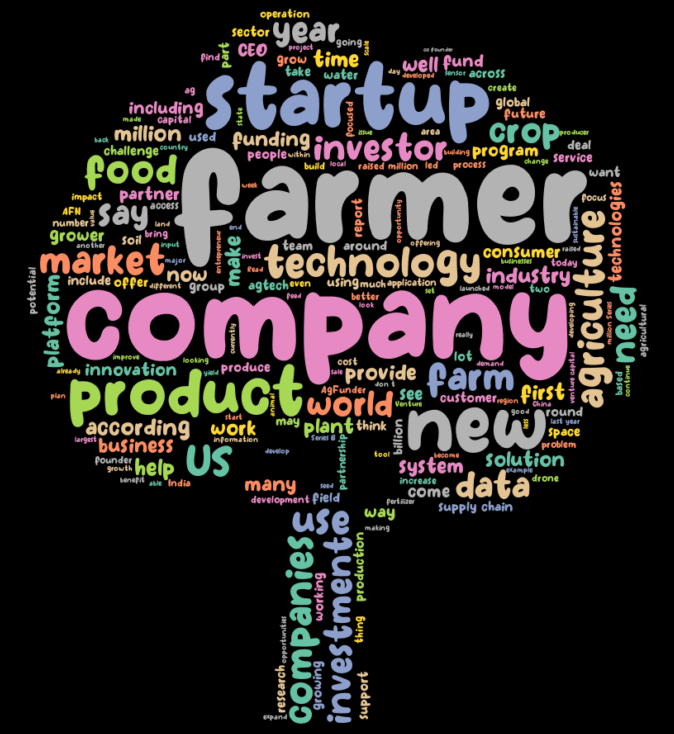

In [48]:
mask = np.array(Image.open("C:/Users/Владислав/Desktop/tree.png"))
font_path = "C:/Users/Владислав/Desktop/first_coffee/First Coffee.otf"
wordcloud = WordCloud(font_path = font_path, stopwords=stopwords, width=1600, height=800, mask=mask, 
                      background_color="black", colormap="Set2").generate(final)
plt.figure(figsize=(20,10), facecolor="k")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()